In [1]:
!pip install -q kaggle

In [2]:
#!/bin/bash
!kaggle datasets download shijo96john/heart-disease-prediction-image-dataset

Dataset URL: https://www.kaggle.com/datasets/shijo96john/heart-disease-prediction-image-dataset
License(s): apache-2.0
100% 289M/290M [00:15<00:00, 20.4MB/s]
100% 290M/290M [00:15<00:00, 20.0MB/s]


In [3]:
!unzip /content/heart-disease-prediction-image-dataset.zip -d /content/ECG_Images

Archive:  /content/heart-disease-prediction-image-dataset.zip
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-1-_jpg.rf.40061f175a63955cf807d9a138be9303.jpg  
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-104-_jpg.rf.06cf0325d1c78189876befdab33ff95e.jpg  
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-115-_jpg.rf.acf8931a4187a677a7e177e8710ac8b6.jpg  
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-116-_jpg.rf.e2d8a2796a0501af56c2384d16dc3708.jpg  
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-125-_jpg.rf.f1e04ef7c78014429fb068eb24a47614.jpg  
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-139-_jpg.rf.584dc66f724c7959e2458016bce858f2.jpg  
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-159-_jpg.rf.bb2f8d262d1d91a25539ff603f7150d0.jpg  
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-196-_jpg.rf.a283d2d2c1de44f943d600eb7a0031c6.jpg  
  inflating: /content/ECG_Images/Dataset_ECG/test/AHB/HB-205-_jpg.rf.af125c8

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameters
img_width, img_height = 224, 224
batch_size = 32
num_classes = 5
epochs = 20


In [6]:
# Define dataset paths
train_data_dir = '/content/ECG_Images/Dataset_ECG/train'
val_data_dir = '/content/ECG_Images/Dataset_ECG/valid'
test_data_dir = '/content/ECG_Images/Dataset_ECG/test'


In [7]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 3993 images belonging to 5 classes.
Found 384 images belonging to 5 classes.
Found 191 images belonging to 5 classes.


In [8]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,245,957 (84.86 MB)

 Trainable params: 22,245,957 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,245,957 (84.86 MB)

 Trainable params: 22,245,957 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 555ms/step - accuracy: 0.3858 - loss: 2.5327 - val_accuracy: 0.5130 - val_loss: 1.2371
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


125/125 ━━━━━━━━━━━━━━━━━━━━ 58s 445ms/step - accuracy: 0.5485 - loss: 1.1630 - val_accuracy: 0.6120 - val_loss: 1.1108
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 438ms/step - accuracy: 0.6525 - loss: 0.9745 - val_accuracy: 0.3698 - val_loss: 1.8321
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 441ms/step - accuracy: 0.6660 - loss: 0.9449 - val_accuracy: 0.6016 - val_loss: 1.0522
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 442ms/step - accuracy: 0.7237 - loss: 0.7838 - val_accuracy: 0.6094 - val_loss: 1.1023
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 445ms/step - accuracy: 0.7376 - loss: 0.7581 - val_accura

In [14]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7500 - loss: 0.5656

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 0.7228 - loss: 0.7572
Test Loss: 0.7128, Test Accuracy: 0.7539


In [15]:
# Save the model
model.save("/content/drive/MyDrive/CNN.h5")

In [16]:
# Generate classification report
test_predictions = model.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())

report = classification_report(test_true_labels, test_pred_labels, target_names=class_names)
print(report)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step
              precision    recall  f1-score   support

         AHB       0.64      0.75      0.69        51
    COVID-19       1.00      0.71      0.83        24
         HMI       0.88      0.33      0.48        21
          MI       0.00      0.00      0.00         4
      Normal       0.77      0.90      0.83        91

    accuracy                           0.75       191
   macro avg       0.66      0.54      0.57       191
weighted avg       0.76      0.75      0.74       191



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


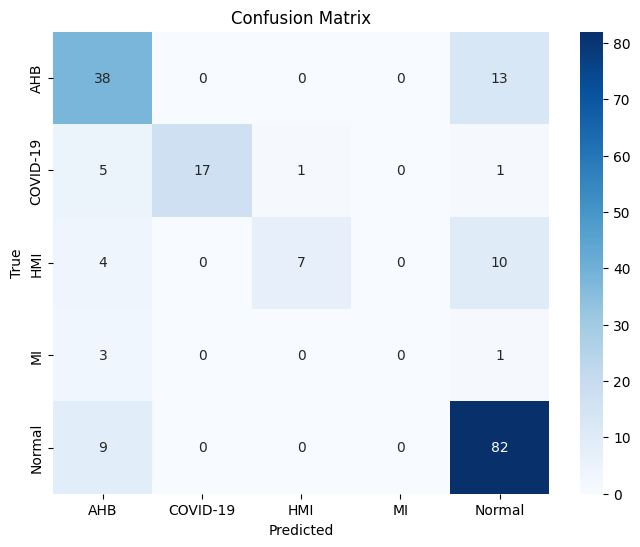

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model_path = "/content/drive/MyDrive/CNN.h5"
model = tf.keras.models.load_model(model_path)

# Load and preprocess the single image
img_path = "/content/ECG_Images/Dataset_ECG/test/COVID-19/Binder1_Page_025_jpg.rf.2dd298964614859c88e9fee6ebc841a0.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.  # Normalize the image


In [22]:
# Make predictions
predictions = model.predict(img_array)

# Interpret the predictions
class_names = ["AHB", "COVID-19", "HMI", "MI","Normal"]
predicted_class = np.argmax(predictions)

print("Predicted class:", class_names[predicted_class])
print("Confidence:", predictions[0][predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Predicted class: COVID-19
Confidence: 0.9997464


In [23]:
# Single Image Prediction
def predict_image(img_path, model, class_names):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.  # Normalize

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    print(f"Predicted Class: {class_names[predicted_class]}")
    print(f"Confidence: {predictions[0][predicted_class]:.4f}")

# Test on a single image
img_path = "/content/ECG_Images/Dataset_ECG/test/COVID-19/Binder1_Page_025_jpg.rf.2dd298964614859c88e9fee6ebc841a0.jpg"
predict_image(img_path, model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: COVID-19
Confidence: 0.9997
